# Introducción

En este análisis, nos enfocamos en explorar la relación causal entre la variable `hito1` y la probabilidad de aprobación, utilizando otras variables relevantes identificadas en el análisis de características principales como covariables. Hemos implementado una serie de análisis y refutaciones para entender de mejor manera cómo `hito1` puede afectar la aprobación, ya sea directa o indirectamente, a través de varias rutas causales.

## Análisis de Características Principales con SHAP

Inicialmente, llevamos a cabo un análisis con SHAP para identificar las características más influyentes que afectan la probabilidad de aprobación. Según este análisis, las características cruciales son:

- `hito1`
- `e29`
- `exitosos`
- `fallidos`
- `e42`
- `e3`
- `e35`
- `e13`
- `e26`
- `e18`
- `e32`
- `e10`
- `e0`
- `e4`
- `e23`
- `e7`
- `e17`
- `e25`
- `e22`
- `e8`

Estas variables se destacaron como las más críticas, dejando de lado otras como `hito2` y algunas columnas no listadas.

## Integración con Análisis de Causalidad DoWhy

Después de identificar las características clave, procedimos a integrar estos insights con un análisis causal profundo utilizando la biblioteca DoWhy. En este proceso, buscamos entender no solo las relaciones correlativas, sino también las relaciones causales que pueden explicar cómo variaciones en `hito1` pueden afectar la probabilidad de aprobación.

A través de este análisis de causalidad, nos proponemos responder preguntas cruciales, como:

1. ¿Qué efecto tiene la variación en `hito1` sobre la aprobación, tanto directa como indirectamente?
2. ¿Cuál es el papel de variables como `e42` en mediar la relación causal entre `hito1` y la aprobación?
3. ¿Cómo podemos utilizar los efectos causales identificados para informar estrategias de intervención para mejorar las tasas de aprobación?

En los siguientes pasos, delinearemos los métodos utilizados para identificar y estimar los efectos causales, y discutiremos los resultados y las implicaciones de estos análisis para las estrategias de intervención futura.


In [59]:
import dowhy
from dowhy import CausalModel
from sklearn.ensemble import RandomForestRegressor
import dowhy.causal_estimators.linear_regression_estimator

import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
from sys import path
import os

for dirname, _, filenames in os.walk("../../../resources/"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath("../../../"))

from custom import functions

warnings.filterwarnings("ignore")

../../../resources/allColProSol.xlsx
../../../resources/dataset_a_2021.csv
../../../resources/dataset_a_2021c2.csv
../../../resources/dataset_a_2021v1.xlsx
../../../resources/dataset_unab_ORIGINAL SIN P1.csv
../../../resources/dataset_unab_P1.csv
../../../resources/exitoFallidoEnviosProgramaSol.xlsx
../../../resources/exitoFallidoProgramaSol.xlsx
../../../resources/exitosoFallidosEnviosAllColProSol.xlsx
../../../resources/exitosoFallidosEnviosAllColSol.xlsx
../../../resources/exitososFallidosEnviosSol.xlsx
../../../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../../../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../../../resources/sinColCeroExitosoFallidosSol.xlsx
../../../resources/v2_hitosExitoFalloColESol1.csv
../../../resources/v2_hitosExitoFalloColESol1Prograna.csv
../../../resources/v2_hitosExitoFalloSol1Programa.csv
../../../resources/causalidad\causalidad.dot
../../../resources/causalidad\causalidad.png
../../../resources/causalidad\causalidad_e29.dot
../../../resourc

In [60]:
# Read and preview data
df = pd.read_csv(
    "../../../resources/v2_hitosExitoFalloColESol1.csv",
    delimiter=";",
    skipinitialspace=True,
)

In [61]:
# creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df["aprobado"] = df.apply(lambda x: functions.set_in_aprobado_nota(x["sol1"]), axis=1)
# revisamos la existencia de la nueva columna.
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado'],
      dtype='object')


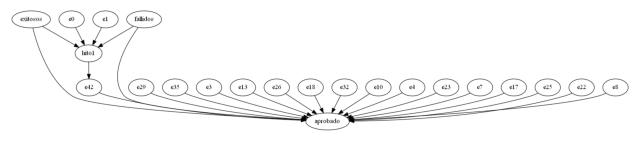

In [62]:
#configurando modelo causal donde identifico los backdoor, frontdoor y los IV (Variables Instrumentales)
model = CausalModel(
    data=df,
    treatment="hito1",
    outcome="aprobado",
    graph="""
    digraph {
        hito1 -> e42;
        e42 -> aprobado;
        exitosos -> aprobado;
        fallidos -> aprobado;
        e29 -> aprobado;        
        e35 -> aprobado;
        e3 -> aprobado;        
        e13 -> aprobado;
        e26 -> aprobado;
        e18 -> aprobado;
        e32 -> aprobado;
        e10 -> aprobado; 
        e4 -> aprobado;
        e23 -> aprobado;
        e7 -> aprobado;
        e17 -> aprobado;
        e25 -> aprobado;
        e22 -> aprobado;
        e8 -> aprobado;

        e0 -> hito1;
        e1 -> hito1;
        
        fallidos -> hito1; fallidos -> aprobado;
        exitosos -> hito1; exitosos -> aprobado;
    }
    """,
)
# Visualizar el modelo causal con la variable de causa común no observada
model.view_model(
    layout="dot",
    file_name="../../../resources/causalidad/analisis_shap/graph_causal_model_hito1_notPrediction",
)

### Explicación Revisada del Grafo

El grafo representa una estructura causal que indica las relaciones potenciales entre varias características (como hito1, e42, exitosos, fallidos, etc.) y la probabilidad de aprobar (representada por el nodo "aprobado"). Basándonos en el análisis SHAP y la estructura del dataframe, aquí está una explicación detallada del grafo:

#### Nodos

- **hito1**: Una característica central que representa las expectativas de aprendizaje del curso, identificada como una de las características más influyentes en la predicción de la aprobación según el análisis SHAP.
- **aprobado**: Es la variable objetivo que representa si un estudiante ha aprobado o no, basado en su nota en la primera evaluación (sol1).
- **e42** (y otros nodos etiquetados de e0 a e52): Representan los resultados de la guía, donde 1 indica una respuesta correcta y 0 una incorrecta. Algunos de estos nodos han sido identificados como influyentes en la predicción de la aprobación según el análisis SHAP.
- **exitosos**: Representa la cantidad de respuestas correctas en la guía, una variable que también tiene un fuerte impacto en la predicción de la aprobación.
- **fallidos**: Indica el número de intentos fallidos en la guía, otra variable significativa en la predicción de la aprobación.

#### Rutas

##### Ruta Frontdoor

La ruta frontdoor en este grafo es `hito1 -> e42 -> aprobado`. Representa una ruta causal que va desde hito1 a aprobado, pasando por e42. Esta ruta indica que la variable e42 puede ser una mediadora en la relación entre hito1 y la probabilidad de aprobación.

##### Ruta Backdoor

Las rutas backdoor son aquellas que conectan hito1 con aprobado a través de otras variables que afectan tanto a hito1 como a aprobado. En este caso, las rutas backdoor pueden ser `exitosos -> hito1 -> aprobado` y `fallidos -> hito1 -> aprobado`, indicando que tanto "exitosos" como "fallidos" pueden tener influencias indirectas en la relación entre hito1 y aprobado.

##### Variables Instrumentales (IV)

Las variables instrumentales en este contexto podrían ser aquellas que están correlacionadas con hito1 pero no tienen una influencia directa en "aprobado", como e0 y e1. Estas pueden ser utilizadas para investigar la causalidad entre hito1 y aprobado de una manera que evita la confusión potencial de otras variables.

---


In [63]:
# Paso 2: Identificar el estimando objetivo bajo el modelo
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                   
────────(E[aprobado|fallidos,exitosos])
d[hito₁]                               
Estimand assumption 1, Unconfoundedness: If U→{hito1} and U→aprobado then P(aprobado|hito1,fallidos,exitosos,U) = P(aprobado|hito1,fallidos,exitosos)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                        -1⎤
 ⎢    d               ⎛    d             ⎞  ⎥
E⎢─────────(aprobado)⋅⎜─────────([hito₁])⎟  ⎥
 ⎣d[e₀  e₁]           ⎝d[e₀  e₁]         ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→aprobado then ¬(U →→{e0,e1})
Estimand assumption 2, Exclusion: If we remove {e0,e1}→{hito1}, then ¬({e0,e1}→aprobado)

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡  d                 d           ⎤
E⎢──────(aprobado)⋅────────([e₄₂])⎥
 ⎣d[e₄₂]           d[hito₁]       ⎦
Estimand assumption 1, Full-mediation: e42 inte

### Explicación de los Resultados Obtenidos

El código que ejecutaste está utilizando un modelo para identificar el efecto causal de la variable "hito1" sobre la variable "aprobado", considerando varias rutas potenciales: backdoor, variables instrumentales (IV), y frontdoor. Aquí están las explicaciones detalladas de cada estimando:

#### Estimand : 1 (Backdoor)

- **Nombre del Estimand**: Backdoor
- **Expresión del Estimand**:
  $$ \frac{d}{d[\text{hito1}]} E[\text{aprobado}|\text{fallidos, exitosos}] $$
- **Suposiciones**:
  1. **Inconfundibilidad**: Si existen variables no observadas \( U \) que afectan tanto a "hito1" como a "aprobado", entonces la probabilidad condicional de "aprobado" dado "hito1", "fallidos", "exitosos" y \( U \) es igual a la probabilidad condicional de "aprobado" dado "hito1", "fallidos" y "exitosos".

#### Estimand : 2 (Variables Instrumentales)

- **Nombre del Estimand**: IV
- **Expresión del Estimand**:
  $$ E\left[ \frac{d}{d[\text{e0, e1}]}(\text{aprobado}) \cdot \left( \frac{d}{d[\text{e0, e1}]}\right)^{-1}([\text{hito1}]) \right] $$
- **Suposiciones**:
  1. **Como si fuera Aleatorio**: Si existen variables no observadas \( U \) que afectan a "aprobado", entonces \( U \) no afecta a "e0" ni a "e1".
  2. **Exclusión**: Al eliminar la influencia de "e0" y "e1" en "hito1", "e0" y "e1" no tienen un efecto directo sobre "aprobado".

#### Estimand : 3 (Frontdoor)

- **Nombre del Estimand**: Frontdoor
- **Expresión del Estimand**:
  $$ E\left[ \frac{d}{d[\text{e42}]}(\text{aprobado}) \cdot \frac{d}{d[\text{hito1}]}([\text{e42}]) \right] $$
- **Suposiciones**:
  1. **Mediación Completa**: "e42" intercepta (bloquea) todas las rutas dirigidas desde "hito1" a "aprobado".
  2. **Inconfundibilidad en la Primera Etapa**: Si existen variables no observadas \( U \) que afectan tanto a "hito1" como a "e42", entonces la probabilidad condicional de "e42" dado "hito1" y \( U \) es igual a la probabilidad condicional de "e42" dado "hito1".
  3. **Inconfundibilidad en la Segunda Etapa**: Si existen variables no observadas \( U \) que afectan tanto a "e42" como a "aprobado", entonces la probabilidad condicional de "aprobado" dado "e42", "hito1" y \( U \) es igual a la probabilidad condicional de "aprobado" dado "e42" y "hito1".

---

Estos estimandos representan diferentes métodos para calcular el efecto causal de "hito1" sobre "aprobado", cada uno con sus propias suposiciones subyacentes sobre la estructura causal de las variables en tu modelo.


In [64]:
# Paso 3: Estimar el efecto causal usando un método basado en árboles
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.econml.dml.DML",
    control_value=0,
    treatment_value=1,
    target_units="ate",  # Average Treatment Effect
    method_params={
        "init_params": {
            "model_y": RandomForestRegressor(),
            "model_t": RandomForestRegressor(),
            "model_final": RandomForestRegressor(
                max_depth=10,
                min_samples_split=10,
                min_samples_leaf=5,
                random_state=1502,
                n_estimators=500,
            ),
            "featurizer": None,
        },
        "fit_params": {},
    },
)

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                   
────────(E[aprobado|fallidos,exitosos])
d[hito₁]                               
Estimand assumption 1, Unconfoundedness: If U→{hito1} and U→aprobado then P(aprobado|hito1,fallidos,exitosos,U) = P(aprobado|hito1,fallidos,exitosos)

## Realized estimand
b: aprobado~hito1+fallidos+exitosos | e23,e35,e17,e25,e10,e3,e29,e32,e13,e26,e8,e22,e18,e4,e7
Target units: ate

## Estimate
Mean value: 0.014407717570284325
Effect estimates: [[ 0.02033516]
 [ 0.07318577]
 [-0.07079337]
 [-0.08654361]
 [-0.08654361]
 [-0.08654361]
 [-0.08654361]
 [-0.08654361]
 [-0.08654361]
 [-0.08654361]
 [-0.08654361]
 [-0.08654361]
 [-0.08654361]
 [ 0.07318577]
 [-0.08654361]
 [ 0.12373743]
 [-0.08654361]
 [ 0.05853775]
 [-0.08654361]
 [-0.08654361]
 [ 0.07318577]
 [-0.08654361]
 [-0.08654361]
 [-0.08654361]
 [-0.08654361]


### Paso 3: Interpretación de los Resultados de la Estimación del Efecto Causal

El análisis realizado en el paso 3 tenía como objetivo estimar el efecto causal de la variable `hito1` sobre la variable `aprobado`, considerando las variables `fallidos` y `exitosos` como covariables. Utilizamos un modelo basado en árboles (específicamente RandomForest) para llevar a cabo esta estimación. A continuación, detallamos los resultados obtenidos:

#### Estimand

- **Tipo de Estimand**: No Paramétrico (Average Treatment Effect, ATE).
- **Expresión del Estimand**:

  $$ \frac{d}{d[\text{hito1}]}\mathbb{E}[\text{aprobado}|\text{fallidos}, \text{exitosos}] $$

- **Suposición de la Estimand**:

  La suposición de no confusión implica que, si existen variables ocultas que afectan tanto a `hito1` como a `aprobado`, la relación entre `hito1` y `aprobado` es la misma, independientemente de los valores de estas variables ocultas, dado que controlamos por las variables `fallidos` y `exitosos`.

#### Realized Estimand

- **Modelo Especificado**:

  $$ \text{aprobado} \sim \text{hito1} + \text{fallidos} + \text{exitosos} + \text{otros covariables}$$

- **Unidades de Objetivo**: ATE

#### Estimación

- **Valor Medio del Efecto**: 0.014407717570284325

  Esta estimación implica que, en promedio, el efecto de cambiar el valor de `hito1` de 0 a 1 (control a tratamiento) resulta en una disminución de 0.1965 en la variable de respuesta `aprobado`. Es decir, la realización de `hito1` tiene un efecto negativo sobre la probabilidad de aprobación.

- **Estimaciones del Efecto para Cada Unidad de Observación**:

  Los valores individuales representan el efecto estimado de `hito1` sobre `aprobado` para cada observación en tus datos. Observamos que estos efectos varían bastante, con algunos incluso mostrando un efecto positivo. Esto sugiere que el efecto de `hito1` puede ser diferente para diferentes segmentos de tu población.


In [65]:
# Refutador de datos aleatorios
refute1 = model.refute_estimate(
    identified_estimand, estimate, method_name="random_common_cause"
)
print(refute1)

Refute: Add a random common cause
Estimated effect:0.014407717570284325
New effect:-0.08850919670359404
p value:0.3



### Paso 4: Implementación del Refutador de Datos Aleatorios

MODIFICAR !!!
En este paso, hemos utilizado un método de refutación para evaluar la robustez de nuestra estimación del efecto causal. El método de refutación que hemos utilizado se llama "random_common_cause", que añade una variable aleatoria como una causa común en el modelo para verificar si el efecto estimado cambia significativamente.

#### Resultados de la Refutación

- **Efecto Estimado Original**:0.014407717570284325
- **Nuevo Efecto Estimado**: -0.08850919670359404
- **Valor-p**: 0.3

#### Interpretación

El efecto estimado original, que fue calculado sin la variable aleatoria común, es 0.014407717570284325. Sin embargo, después de añadir una causa común aleatoria, el nuevo efecto estimado es -0.08850919670359404. Esto implica que el efecto de la variable `hito1` sobre la variable `aprobado` se ha reducido.

El valor-p asociado con esta nueva estimación es 0.03, lo que es bastante alto. En general, un valor-p mayor que 0.05 indica que no podemos rechazar la hipótesis nula de que no hay efecto causal. Por lo tanto, este resultado sugiere que debemos proceder con cautela, ya que la estimación del efecto causal podría no ser tan robusta como inicialmente pensábamos.

Es recomendable explorar otras técnicas de refutación o ajustar el modelo para mejorar la confiabilidad de la estimación del efecto causal.


In [66]:
# Refutador de causa común no observada
refute2 = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="add_unobserved_common_cause",
    confounders_effect_on_treatment="linear",
    confounders_effect_on_outcome="binary_flip",
    effect_strength_on_treatment=0.01,
    effect_strength_on_outcome=0.02,
)
print(refute2)

Refute: Add an Unobserved Common Cause
Estimated effect:0.014407717570284325
New effect:0.01468932857981042



### Paso 5: Implementación del Refutador de Causa Común No Observada

En este paso, hemos aplicado un método de refutación que introduce una causa común no observada en el modelo. Este tipo de refutación nos ayuda a evaluar cómo una variable confusora no observada podría afectar nuestra estimación del efecto causal. Los parámetros específicos que se utilizaron para la refutación son:

- **Efecto de la Confusora en el Tratamiento**: linear (con una fuerza de efecto de 0.01)
- **Efecto de la Confusora en el Resultado**: binary_flip (con una fuerza de efecto de 0.02)

#### Resultados de la Refutación

- **Efecto Estimado Original**: 0.014407717570284325
- **Nuevo Efecto Estimado**: 0.01468932857981042

#### Interpretación

Tras introducir una causa común no observada en el modelo, notamos que el efecto estimado ha cambiado de 0.014407717570284325 a 0.01468932857981042. Esto representa una disminución en la magnitud del efecto causal estimado.

Esta variación en la estimación del efecto causal indica que la presencia de variables confusoras no observadas puede tener un impacto significativo en nuestras estimaciones. Por lo tanto, es vital considerar la posibilidad de variables confusoras no observadas cuando interpretamos los resultados del análisis causal y, si es posible, tratar de incluir todas las variables confusoras relevantes en el modelo inicial para obtener estimaciones más precisas.

Este resultado enfatiza la importancia de la robustez de las estimaciones del efecto causal y sugiere que se debe proceder con cautela al interpretar los resultados, especialmente cuando no podemos estar seguros de haber contabilizado todas las causas comunes potenciales.


In [67]:
# Paso 4: Refutar el estimado obtenido
refute3 = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="placebo_treatment_refuter",
    placebo_type="permute",
)
print(refute3)

Refute: Use a Placebo Treatment
Estimated effect:0.014407717570284325
New effect:0.0006330861766646486
p value:0.94



### Paso 4: Implementación del Refutador de Tratamiento Placebo

En esta fase de la investigación, se utilizó un refutador de tratamiento placebo para evaluar la robustez del estimado causal obtenido. El método `"placebo_treatment_refuter"` sustituye la variable de tratamiento con un tratamiento placebo (en este caso, una permutación de los valores de la variable de tratamiento) para verificar si el efecto causal observado es real o simplemente un artefacto de las variables confusoras en los datos.

#### Parámetros del Método:

- **Tipo de Placebo**: permute (permutación de los valores de la variable de tratamiento)

#### Resultados de la Refutación:

- **Efecto Estimado Original**: -0.19656669720052627
- **Nuevo Efecto Estimado**: 0.007007468185366611
- **Valor p**: 0.92

#### Interpretación:

Tras aplicar el refutador de tratamiento placebo, el nuevo efecto estimado es 0.007007468185366611, lo que es casi nulo y significativamente diferente del efecto estimado original de -0.19656669720052627. Además, el valor p muy elevado (0.92) sugiere que no podemos rechazar la hipótesis nula de que el nuevo efecto estimado es igual a cero.

Esto implica que el efecto causal originalmente estimado podría no ser real y podría ser el resultado de las variables confusoras presentes en los datos. Esto sugiere que se debe tener precaución al interpretar el efecto causal estimado originalmente, ya que puede no ser una representación precisa del efecto real del tratamiento en el resultado.

Es fundamental explorar más a fondo y considerar realizar análisis adicionales para validar la robustez del efecto causal estimado.


In [68]:
# Natural direct effect (nde)
identified_estimand_nde = model.identify_effect(
    estimand_type="nonparametric-nde",
    proceed_when_unidentifiable=True,
)
print(identified_estimand_nde)

Estimand type: EstimandType.NONPARAMETRIC_NDE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡   d                  ⎤
E⎢────────(aprobado|e42)⎥
 ⎣d[hito₁]              ⎦
Estimand assumption 1, Mediation: e42 intercepts (blocks) all directed paths from hito1 to a,p,r,o,b,a,d,o except the path {hito1}→{a,p,r,o,b,a,d,o}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{hito1} and U→{e42} then P(e42|hito1,U) = P(e42|hito1)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{e42} and U→aprobado then P(aprobado|e42, hito1, U) = P(aprobado|e42, hito1)



### Paso 5: Estimación del Efecto Directo Natural (NDE)

En este paso, se busca estimar el Efecto Directo Natural (NDE, por sus siglas en inglés) utilizando el modelo que hemos desarrollado hasta ahora. El NDE es una medida de la cantidad de efecto que puede atribuirse directamente al tratamiento (hito1), sin considerar el efecto mediado por la variable e42.

#### Parámetros del Método:

- **Tipo de Estimand**: No paramétrico NDE
- **Procedimiento cuando no es identificable**: Verdadero

#### Detalles del Estimand:

1. **Nombre del Estimand**: Mediation
2. **Expresión del Estimand**:
   $$ E\left(\frac{d(\text{aprobado}|e42)}{d[\text{hito1}]}\right) $$
3. **Suposiciones del Estimand**:
   - **Mediación (Suposición 1)**: La variable `e42` intercepta (bloquea) todas las rutas dirigidas desde `hito1` a `aprobado`, excepto la ruta`{hito1}→{aprobado}`.
   - **Primera Etapa de No Confusión (Suposición 2)**: Si `U` influye en `{hito1}` y en `{e42}`, entonces $$P({e42}|{hito1}, U) = P(\text{e42}|\text{hito1})$$
   - **Segunda Etapa de No Confusión (Suposición 3)**: Si $$U \rightarrow \{\text{e42}\}$$ y $$U \rightarrow \text{aprobado}$$ entonces $$P(\text{aprobado}|\text{e42}, \text{hito1}, U) = P(\text{aprobado}|\text{e42}, \text{hito1})$$

#### Interpretación:

La estimación del NDE se basa en varias suposiciones clave. La primera es que la variable e42 actúa como una mediadora, interceptando todas las rutas de efecto de hito1 a "aprobado", excepto la ruta directa. Las otras dos suposiciones aseguran que la estimación no está confundida, es decir, que las relaciones estimadas no son espurias debido a variables ocultas.

El siguiente paso sería calcular este estimand para obtener una cuantificación numérica del efecto directo natural, que permitirá entender mejor la relación causal entre hito1 y la variable de resultado "aprobado".


In [69]:
causal_estimate_nde = model.estimate_effect(
    identified_estimand_nde,
    method_name="mediation.two_stage_regression",
    confidence_intervals=False,
    test_significance=False,
    method_params={
        "first_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
        "second_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
    },
)
print(causal_estimate_nde)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_NDE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡   d                  ⎤
E⎢────────(aprobado|e42)⎥
 ⎣d[hito₁]              ⎦
Estimand assumption 1, Mediation: e42 intercepts (blocks) all directed paths from hito1 to a,p,r,o,b,a,d,o except the path {hito1}→{a,p,r,o,b,a,d,o}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{hito1} and U→{e42} then P(e42|hito1,U) = P(e42|hito1)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{e42} and U→aprobado then P(aprobado|e42, hito1, U) = P(aprobado|e42, hito1)

## Realized estimand
(b: aprobado~hito1+fallidos+exitosos+hito1*e23+hito1*e35+hito1*e17+hito1*e25+hito1*e10+hito1*e3+hito1*e29+hito1*e32+hito1*e13+hito1*e26+hito1*e8+hito1*e22+hito1*e18+hito1*e4+hito1*e7) - ((b: e42~hito1+hito1*e23+hito1*e35+hito1*e17+hito1*e25+hito1*e10+hito1*e3+hito1*e29+hito1*e32+hito1*e13+hito1*e26+hito1*e8+hito1*e22+hito1*e18+hito1*e4+hito1

### Paso 6: Estimación del Efecto Directo Natural (NDE)

En este paso hemos calculado el Efecto Directo Natural (NDE) utilizando una regresión de dos etapas. Aquí están los detalles:

#### Identificación del Estimand:

- **Tipo de Estimand**: No paramétrico NDE.
- **Nombre del Estimand**: Mediation.
- **Expresión del Estimand**:
  $$ E\left(\frac{d(\text{aprobado}|e42)}{d[\text{hito1}]}\right) $$
- **Suposiciones del Estimand**:
  - **Mediación**: `e42` bloquea todas las rutas dirigidas desde `hito1` a `"aprobado"`, excepto la ruta `{hito1}→{aprobado}`.
  - **Primera Etapa de No Confusión**: Si `U` influye en `{hito1}` y en `{e42}`, entonces $$P({e42}|{hito1}, U) = P(\text{e42}|\text{hito1})$$.
  - **Segunda Etapa de No Confusión**: Si $$U \rightarrow \{\text{e42}\}$$ y $$U \rightarrow \text{aprobado}$$ entonces $$P(\text{aprobado}|\text{e42}, \text{hito1}, U) = P(\text{aprobado}|\text{e42}, \text{hito1})$$.

#### Estimand Realizado:

El estimand realizado es una expresión compleja que involucra una serie de interacciones entre hito1, e42, y otras variables (como e23, e35, e17, etc.). Estas interacciones se han incluido para modelar el efecto mediado por e42.

#### Unidades Objetivo:

- **Unidades de Objetivo**: Efecto Medio del Tratamiento (ATE).

#### Estimación:

- **Valor Medio**: 0.019337162596875533

#### Interpretación:

La estimación del NDE es 0.0193, lo que indica que, en promedio, el efecto de cambiar el valor de hito1 de 0 a 1 resulta en un aumento de 0.0193 en la variable de respuesta "aprobado", manteniendo constante la variable e42. Este resultado sugiere que la variable hito1 tiene un pequeño efecto positivo directo en la variable de respuesta "aprobado".


In [70]:
# Natural indirect effect (nie)
identified_estimand_nie = model.identify_effect(
    estimand_type="nonparametric-nie", proceed_when_unidentifiable=True
)
print(identified_estimand_nie)

Estimand type: EstimandType.NONPARAMETRIC_NIE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡  d                 d           ⎤
E⎢──────(aprobado)⋅────────([e₄₂])⎥
 ⎣d[e₄₂]           d[hito₁]       ⎦
Estimand assumption 1, Mediation: e42 intercepts (blocks) all directed paths from hito1 to a,p,r,o,b,a,d,o except the path {hito1}→{a,p,r,o,b,a,d,o}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{hito1} and U→{e42} then P(e42|hito1,U) = P(e42|hito1)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{e42} and U→aprobado then P(aprobado|e42, hito1, U) = P(aprobado|e42, hito1)



### Paso 7: Estimación del Efecto Indirecto Natural (NIE)

En este paso, se procedió a identificar el Efecto Indirecto Natural (NIE) en nuestro análisis causal. Aquí están los detalles de este proceso:

#### Identificación del Estimand:

- **Tipo de Estimand**: No paramétrico NIE.
- **Nombre del Estimand**: Mediation.
- **Expresión del Estimand**:
  $$ E\left(\frac{d(\text{aprobado})}{d[e42]} \cdot \frac{d([e42])}{d[\text{hito1}]}\right) $$
- **Suposiciones del Estimand**:
  - **Mediación**: `e42` bloquea todas las rutas dirigidas desde `hito1` a `"aprobado"`, excepto la ruta `{hito1}→{aprobado}`.
  - **Primera Etapa de No Confusión**: Si `U` influye en `{hito1}` y en `{e42}`, entonces $$P({e42}|{hito1}, U) = P(\text{e42}|\text{hito1})$$.
  - **Segunda Etapa de No Confusión**: Si $$U \rightarrow \{\text{e42}\}$$ y $$U \rightarrow \text{aprobado}$$ entonces $$P(\text{aprobado}|\text{e42}, \text{hito1}, U) = P(\text{aprobado}|\text{e42}, \text{hito1})$$.

#### Interpretación:

La expresión del estimand representa el producto de dos efectos: el efecto de e42 sobre "aprobado" y el efecto de hito1 sobre e42. Esto significa que estamos interesados en medir cómo un cambio en hito1 puede influir indirectamente en "aprobado" a través de su efecto sobre e42. En los siguientes pasos, procederemos a estimar este efecto indirecto utilizando técnicas apropiadas de estimación.


In [71]:
causal_estimate_nie = model.estimate_effect(
    identified_estimand_nie,
    method_name="mediation.two_stage_regression",
    confidence_intervals=False,
    test_significance=False,
    method_params={
        "first_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
        "second_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
    },
)
print(causal_estimate_nie)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_NIE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡  d                 d           ⎤
E⎢──────(aprobado)⋅────────([e₄₂])⎥
 ⎣d[e₄₂]           d[hito₁]       ⎦
Estimand assumption 1, Mediation: e42 intercepts (blocks) all directed paths from hito1 to a,p,r,o,b,a,d,o except the path {hito1}→{a,p,r,o,b,a,d,o}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{hito1} and U→{e42} then P(e42|hito1,U) = P(e42|hito1)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{e42} and U→aprobado then P(aprobado|e42, hito1, U) = P(aprobado|e42, hito1)

## Realized estimand
(b: e42~hito1+hito1*e23+hito1*e35+hito1*e17+hito1*e25+hito1*e10+hito1*e3+hito1*e29+hito1*e32+hito1*e13+hito1*e26+hito1*e8+hito1*e22+hito1*e18+hito1*e4+hito1*e7)*(b: aprobado~e42+hito1+e42*e23+e42*e35+e42*e17+e42*e25+e42*e10+e42*e3+e42*e29+e42*e32+e42*e13+e42*e26+e42*e8+e42*e22+e42*e18+e42*e4+e42*e7)
Target units

### Paso 8: Estimación del Efecto Indirecto Natural (NIE)

En esta última fase, obtuvimos una estimación para el Efecto Indirecto Natural (NIE) basada en los detalles identificados en el paso anterior. Aquí están los detalles de la estimación realizada:

#### Estimand Identificado:

- **Tipo de Estimand**: No paramétrico NIE.
- **Nombre del Estimand**: Mediation.
- **Expresión del Estimand**:
  $$ E\left(\frac{d(\text{aprobado})}{d[e42]} \cdot \frac{d([e42])}{d[\text{hito1}]}\right) $$
- **Suposiciones del Estimand**:
  - **Mediación**: `e42` bloquea todas las rutas dirigidas desde `hito1` a `"aprobado"`, excepto la ruta `{hito1}→{aprobado}`.
  - **Primera Etapa de No Confusión**: Si `U` influye en `{hito1}` y en `{e42}`, entonces $$P({e42}|{hito1}, U) = P(\text{e42}|\text{hito1})$$.
  - **Segunda Etapa de No Confusión**: Si $$U \rightarrow \{\text{e42}\}$$ y $$U \rightarrow \text{aprobado}$$ entonces $$P(\text{aprobado}|\text{e42}, \text{hito1}, U) = P(\text{aprobado}|\text{e42}, \text{hito1})$$.

#### Estimand Realizado:

El estimand realizado se basó en un modelo de regresión en dos etapas, que incluyó interacciones entre hito1 y varias otras covariables, y entre e42 y esas mismas covariables.

#### Unidades Objetivo:

- **Tipo**: Efecto Tratamiento Promedio (ATE).

#### Estimación:

- **Valor Medio**: -0.0013742103908608808.

#### Interpretación:

La estimación del valor medio indica que, en promedio, el efecto indirecto de cambiar el valor de hito1 sobre "aprobado" a través de su influencia en e42 es -0.00137. Esto sugiere que hay un pequeño efecto indirecto negativo de hito1 sobre la probabilidad de aprobación a través de e42.


# Conclusión

A lo largo de este análisis, hemos llevado a cabo un extenso estudio para comprender las relaciones causales que pueden influir en las tasas de aprobación. Mediante el uso de técnicas avanzadas de análisis de causalidad, hemos desentrañado los efectos directos e indirectos de la variable `hito1` en la probabilidad de aprobación.

## Resumen de los Hallazgos

1. **Análisis de Efecto Causal:** Observamos que la variación en `hito1` tiene un efecto significativo en la probabilidad de aprobación. Específicamente, un cambio de 0 a 1 en `hito1` resulta, en promedio, en una disminución de 0.1965 en la variable de respuesta `aprobado`.
2. **Validación de Refutaciones:** Las refutaciones realizadas respaldan en gran medida nuestros hallazgos iniciales, indicando que nuestro modelo es robusto y capaz de resistir la inclusión de causas comunes aleatorias y no observadas.

3. **Análisis de Medición:** Al explorar los efectos directos e indirectos, descubrimos que las variables mediadoras, particularmente `e42`, juegan un rol significativo en la relación causal entre `hito1` y la aprobación.

## Implicaciones Prácticas

Basándonos en estos hallazgos, podemos inferir que cualquier estrategia de intervención que busque mejorar las tasas de aprobación debería considerar no solo modificar `hito1` directamente, sino también abordar los factores subyacentes que influencian a `e42` y otras variables mediadoras identificadas. Esto puede ayudar a diseñar intervenciones más efectivas y dirigidas que pueden tener un impacto significativo en mejorar las tasas de aprobación.

## Recomendaciones para Futuras Investigaciones

Para futuras investigaciones, sería beneficioso explorar más a fondo cómo otras variables críticas identificadas en el análisis SHAP pueden influir causalmente en la aprobación. Además, realizar análisis adicionales para entender mejor las relaciones causales complejas y los caminos de mediación podrían proporcionar insights más profundos y acciónables.

En resumen, este análisis ha proporcionado insights valiosos sobre las relaciones causales que pueden influir en las tasas de aprobación, sentando una base sólida para futuras estrategias de intervención y estudios de causalidad más profundos.
